# Imports


In [ ]:
pip install scikit-bio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 37.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 29.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-bio: filename=scikit_bio-0.6.2-cp310-cp310-linux_x86_64.whl size=3971929 sha256=51dcd2718ba3e440198d492e7ebabaf88fff09770bae4c96b26dd9059e3be594
  Stored in directory: /root/.cache/pip/wheels/f3/9c/ed/c2b94011fd3765a19330df93f81265e178098dd86c047c1566
  Created wheel for biom-format: filename=biom_format-2.1.16-cp310-cp310-linux_x86_64.whl size=12158975 sha256=412376c3c08ee9ca958a8ec0d52e8a1cf22cf88b7ed8bb4add0cd0bd83542fa2
  Stored in directory: /root/.cache/pip/wheels/8e/a9/f9/197fd5a0e5bbab5f2e03c89194f6c194bed7af5d7a8c8759f3
Successf

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from skbio.diversity import alpha_diversity
from scipy.spatial.distance import pdist, squareform
from skbio.diversity import beta_diversity

# Loading


In [ ]:
def load_asv_file(file_path):
    if os.path.exists(file_path):
        df = pd.read_csv(file_path, sep='\t', index_col=0)
        if df.empty:
            raise ValueError(f"Erro: O arquivo ASV foi carregado, mas está vazio: {file_path}")

        # Transpor a tabela (inversão de linhas e colunas)
        df_transposed = df.T

        return df_transposed
    else:
        raise FileNotFoundError(f"Erro: Arquivo ASV não encontrado: {file_path}")


In [ ]:
meta_all_file = "sample_data/01_metadata_all.txt"
meta_all_csv = pd.read_csv(meta_all_file, sep="\t", index_col=0)
HRT_metadata_ML_all  = meta_all_csv.copy()

In [ ]:
HRT_metadata_ML_all.head()

,Gut compartiment,Experiment,Category,Specific CH4 production (mLNorm gVS-1)_corrected,CH4 (%),O2 (%),CO2 (%),H2 (%),N2 (%),pH,Acetic acid (mg L-1),Propionic acid (mg L-1),Butyric acid (mg L-1)
Sample,,,,,,,,,,,,,
UNDR03_2,Midgut,Enrichement,1T,1.36,4.73,0.0,44.05,0.25,50.97,7.78,4169.61,283.48,140.39
UNDR03_3,Midgut,Enrichement,1T,1.77,5.21,0.0,44.22,0.3,50.27,7.27,4518.43,307.68,80.14
UNDR03_4,Midgut,Enrichement,1T,0.41,1.03,0.0,49.82,0.64,48.51,7.07,4857.67,365.9,110.54
UNDR03_5,Hindgut,Enrichement,1T,7.20,13.62,0.0,47.04,0.2,39.14,9.08,4133.13,413.1,77.77
UNDR03_6,Hindgut,Enrichement,1T,8.85,15.15,0.0,47.55,0,37.30,8.08,4116.09,379.55,74.02


In [ ]:
asv_all_file = "sample_data/map_complete_relative_abundance_table.tsv"
asv_all_csv = load_asv_file(asv_all_file)
# Salvar o original
asv_all_csv_original = asv_all_csv.copy()

# Converter todas as colunas para numérico (se apropriado)
asv_all_csv = asv_all_csv.apply(pd.to_numeric, errors='coerce')

# Substituir NA por um pseudo-count pequeno (1e-6)
pseudo_count = 1e-6
asv_all_csv.fillna(pseudo_count, inplace=True)
print(asv_all_csv.isna().sum().sum())

0


In [ ]:
asv_all_csv.head()

,UNDR01_2HCb-bin.0,UNDR01_2HCb-bin.13,UNDR01_2HCb-bin.15,UNDR01_2HCb-bin.18,UNDR01_2HCb-bin.19,UNDR01_2HCb-bin.21,UNDR01_2HCb-bin.22,UNDR01_2HCb-bin.44,UNDR01_2HCb-bin.49,UNDR01_2HCb-bin.5,...,merge_NG-28520_B96-bin.22,merge_NG-28520_B96-bin.28,merge_NG-28520_B96-bin.29,merge_NG-28520_B96-bin.32,merge_NG-28520_B96-bin.47,merge_NG-28520_B96-bin.48,merge_NG-28520_B96-bin.49,merge_NG-28520_B96-bin.72,merge_NG-28520_B96-bin.8,merge_NG-28520_B96-bin.82
UNDR01_2HCb,5.874668e-03,7.039182e-04,1.356556e-03,1.723893e-03,5.107586e-04,0.038092,8.096271e-04,6.267456e-04,0.049659,1.723279e-03,...,1.841564e-06,3.147973e-07,4.407162e-07,5.630149e-05,8.027331e-07,0.000002,0.000383,0.000037,7.681054e-06,5.194155e-07
UNDR01_2MCb,2.030443e-03,2.442259e-05,7.078613e-05,9.304221e-05,2.881472e-05,0.001583,2.393020e-05,1.500414e-04,0.077127,7.803413e-05,...,3.663389e-06,6.302605e-07,2.954346e-07,8.912277e-05,1.181738e-06,0.000003,0.000467,0.000040,7.149518e-06,1.969564e-07
UNDR03_102,3.572835e-07,4.872048e-08,1.088091e-06,2.273622e-07,4.872048e-08,0.000010,5.034450e-07,1.136811e-07,0.000012,6.496064e-08,...,1.706841e-05,3.842422e-05,1.541191e-05,3.248032e-07,5.571999e-05,0.000133,0.000008,0.000002,1.347933e-06,5.569563e-04
UNDR03_117,1.221989e-06,1.823864e-08,0.000000e+00,2.918182e-07,1.823864e-08,0.000003,6.748296e-07,2.188636e-07,0.000010,3.647727e-08,...,6.383523e-07,5.491654e-05,2.298068e-05,2.371023e-07,3.935898e-05,0.000030,0.000002,0.000001,1.039602e-06,7.131307e-05
UNDR03_118,1.178991e-06,3.186462e-08,3.186462e-08,7.647508e-07,3.186462e-08,0.000002,3.027139e-07,3.186462e-08,0.000011,9.559385e-08,...,7.010216e-07,5.050542e-05,2.381880e-05,4.779693e-08,4.010162e-05,0.000031,0.000003,0.000001,9.400062e-07,2.202482e-04


In [ ]:
# Salvando em arquivos CSV
asv_all_csv.to_csv("sample_data/05_asv_bin_ML_ra.csv")
HRT_asv_ML_all = asv_all_csv.copy()


# Adição de colunas ao mapping

In [ ]:
# Adicionar SampleID como coluna temporária
HRT_asv_ML_all['SampleID'] = HRT_asv_ML_all.index
HRT_asv_ML_all['SampleID'] = HRT_asv_ML_all['SampleID'].astype(str).str.strip()

In [ ]:
# Adicionar SampleID como coluna temporária
HRT_metadata_ML_all['SampleID'] = HRT_metadata_ML_all.index
HRT_metadata_ML_all['SampleID'] = HRT_metadata_ML_all['SampleID'].astype(str).str.strip()

In [ ]:
HRT_metadata_ML_all.head()

,Gut compartiment,Experiment,Category,Specific CH4 production (mLNorm gVS-1)_corrected,CH4 (%),O2 (%),CO2 (%),H2 (%),N2 (%),pH,Acetic acid (mg L-1),Propionic acid (mg L-1),Butyric acid (mg L-1),SampleID
Sample,,,,,,,,,,,,,,
UNDR03_2,Midgut,Enrichement,1T,1.36,4.73,0.0,44.05,0.25,50.97,7.78,4169.61,283.48,140.39,UNDR03_2
UNDR03_3,Midgut,Enrichement,1T,1.77,5.21,0.0,44.22,0.3,50.27,7.27,4518.43,307.68,80.14,UNDR03_3
UNDR03_4,Midgut,Enrichement,1T,0.41,1.03,0.0,49.82,0.64,48.51,7.07,4857.67,365.9,110.54,UNDR03_4
UNDR03_5,Hindgut,Enrichement,1T,7.20,13.62,0.0,47.04,0.2,39.14,9.08,4133.13,413.1,77.77,UNDR03_5
UNDR03_6,Hindgut,Enrichement,1T,8.85,15.15,0.0,47.55,0,37.30,8.08,4116.09,379.55,74.02,UNDR03_6


In [ ]:
HRT_ML_reactor = pd.merge(HRT_asv_ML_all, HRT_metadata_ML_all[['SampleID', 'Gut compartiment', 'Experiment', 'Category']], on='SampleID', how='inner')

In [ ]:
# Transformar SampleID de volta em índice e remover a coluna SampleID
HRT_ML_reactor.set_index('SampleID', inplace=True)
HRT_ML_reactor.index.name = None

In [ ]:
# Transformar SampleID de volta em índice e remover a coluna SampleID
HRT_metadata_ML_all.set_index('SampleID', inplace=True)
HRT_metadata_ML_all.index.name = None

In [ ]:
HRT_ML_reactor

,UNDR01_2HCb-bin.0,UNDR01_2HCb-bin.13,UNDR01_2HCb-bin.15,UNDR01_2HCb-bin.18,UNDR01_2HCb-bin.19,UNDR01_2HCb-bin.21,UNDR01_2HCb-bin.22,UNDR01_2HCb-bin.44,UNDR01_2HCb-bin.49,UNDR01_2HCb-bin.5,...,merge_NG-28520_B96-bin.32,merge_NG-28520_B96-bin.47,merge_NG-28520_B96-bin.48,merge_NG-28520_B96-bin.49,merge_NG-28520_B96-bin.72,merge_NG-28520_B96-bin.8,merge_NG-28520_B96-bin.82,Gut compartiment,Experiment,Category
UNDR01_2HCb,5.874668e-03,7.039182e-04,1.356556e-03,1.723893e-03,5.107586e-04,0.038092,8.096271e-04,6.267456e-04,0.049659,1.723279e-03,...,5.630149e-05,8.027331e-07,1.920263e-06,3.828092e-04,3.695720e-05,7.681054e-06,5.194155e-07,Hindgut,Enrichement,Inoculum
UNDR01_2MCb,2.030443e-03,2.442259e-05,7.078613e-05,9.304221e-05,2.881472e-05,0.001583,2.393020e-05,1.500414e-04,0.077127,7.803413e-05,...,8.912277e-05,1.181738e-06,3.328563e-06,4.667670e-04,3.956854e-05,7.149518e-06,1.969564e-07,Midgut,Enrichement,Inoculum
UNDR03_102,3.572835e-07,4.872048e-08,1.088091e-06,2.273622e-07,4.872048e-08,0.000010,5.034450e-07,1.136811e-07,0.000012,6.496064e-08,...,3.248032e-07,5.571999e-05,1.334454e-04,8.461123e-06,1.916339e-06,1.347933e-06,5.569563e-04,Midgut,Enrichement,2T
UNDR03_117,1.221989e-06,1.823864e-08,0.000000e+00,2.918182e-07,1.823864e-08,0.000003,6.748296e-07,2.188636e-07,0.000010,3.647727e-08,...,2.371023e-07,3.935898e-05,2.982017e-05,2.152159e-06,1.185511e-06,1.039602e-06,7.131307e-05,Midgut,Enrichement,3T
UNDR03_118,1.178991e-06,3.186462e-08,3.186462e-08,7.647508e-07,3.186462e-08,0.000002,3.027139e-07,3.186462e-08,0.000011,9.559385e-08,...,4.779693e-08,4.010162e-05,3.148224e-05,2.676628e-06,1.242720e-06,9.400062e-07,2.202482e-04,Midgut,Enrichement,3T
UNDR03_119,4.378382e-07,2.736489e-08,2.736489e-08,5.472978e-08,5.472978e-08,0.000002,1.641893e-07,8.209467e-08,0.000004,0.000000e+00,...,5.199329e-07,1.953853e-05,1.417501e-05,5.746627e-07,7.662169e-07,3.831085e-07,8.734873e-05,Midgut,Enrichement,3T
UNDR03_121,8.539859e-07,0.000000e+00,1.940877e-08,3.687667e-07,3.881754e-08,0.000003,3.687667e-07,3.493579e-07,0.000012,3.881754e-08,...,1.746789e-07,2.921020e-05,8.609731e-05,5.415047e-06,1.261570e-06,1.491758e-04,6.324154e-04,Hindgut,Enrichement,3T
UNDR03_122,4.726226e-07,0.000000e+00,0.000000e+00,3.585413e-07,1.629733e-08,0.000003,3.422440e-07,2.444600e-07,0.000007,3.259466e-08,...,1.629733e-07,3.565856e-05,7.845536e-05,1.324973e-05,1.499355e-06,2.750990e-04,6.225581e-05,Hindgut,Enrichement,3T
UNDR03_123,6.888163e-07,3.532391e-08,3.532391e-08,2.472674e-07,7.064782e-08,0.000003,2.472674e-07,1.236337e-07,0.000007,7.064782e-08,...,1.412956e-07,3.023727e-05,7.024160e-05,1.296388e-05,1.165689e-06,2.563103e-04,2.112547e-04,Hindgut,Enrichement,3T
UNDR03_1HAb,1.031195e-03,2.483235e-05,1.452603e-05,7.237441e-05,9.718119e-07,0.000004,1.061577e-04,5.293817e-06,0.000138,1.585588e-06,...,2.224938e-06,1.534440e-07,1.022960e-07,7.672199e-08,2.199364e-06,7.672199e-08,1.534440e-07,Hindgut,Enrichement,Inoculum


In [ ]:
HRT_metadata_ML_all.head()

,Gut compartiment,Experiment,Category,Specific CH4 production (mLNorm gVS-1)_corrected,CH4 (%),O2 (%),CO2 (%),H2 (%),N2 (%),pH,Acetic acid (mg L-1),Propionic acid (mg L-1),Butyric acid (mg L-1)
UNDR03_2,Midgut,Enrichement,1T,1.36,4.73,0.0,44.05,0.25,50.97,7.78,4169.61,283.48,140.39
UNDR03_3,Midgut,Enrichement,1T,1.77,5.21,0.0,44.22,0.3,50.27,7.27,4518.43,307.68,80.14
UNDR03_4,Midgut,Enrichement,1T,0.41,1.03,0.0,49.82,0.64,48.51,7.07,4857.67,365.9,110.54
UNDR03_5,Hindgut,Enrichement,1T,7.20,13.62,0.0,47.04,0.2,39.14,9.08,4133.13,413.1,77.77
UNDR03_6,Hindgut,Enrichement,1T,8.85,15.15,0.0,47.55,0,37.30,8.08,4116.09,379.55,74.02


In [ ]:
# 1) Filtro de prevalência (remover ASVs que são zero em todas as amostras)
zero_asvs = HRT_ML_reactor.columns[(HRT_ML_reactor == 0).all()]
HRT_ML_reactor.drop(columns=zero_asvs, inplace=True)

In [ ]:
HRT_ML_reactor.dtypes


,0
UNDR01_2HCb-bin.0,float64
UNDR01_2HCb-bin.13,float64
UNDR01_2HCb-bin.15,float64
UNDR01_2HCb-bin.18,float64
UNDR01_2HCb-bin.19,float64
...,...
merge_NG-28520_B96-bin.8,float64
merge_NG-28520_B96-bin.82,float64
Gut compartiment,object
Experiment,object


# Anlyses


In [ ]:
# Cada linha representa uma amostra e as colunas são OTUs
data = HRT_asv_ML_all.copy()
data.shape

(55, 590)

In [ ]:
metadata = HRT_metadata_ML_all.loc[:, ['Gut compartiment', 'Experiment', 'Category']].copy()
metadata.head()

,Gut compartiment,Experiment,Category
UNDR03_2,Midgut,Enrichement,1T
UNDR03_3,Midgut,Enrichement,1T
UNDR03_4,Midgut,Enrichement,1T
UNDR03_5,Hindgut,Enrichement,1T
UNDR03_6,Hindgut,Enrichement,1T


In [ ]:
metadata.shape

(55, 3)

In [ ]:
print(data.dtypes)


UNDR01_2HCb-bin.0            float64
UNDR01_2HCb-bin.13           float64
UNDR01_2HCb-bin.15           float64
UNDR01_2HCb-bin.18           float64
UNDR01_2HCb-bin.19           float64
                              ...   
merge_NG-28520_B96-bin.49    float64
merge_NG-28520_B96-bin.72    float64
merge_NG-28520_B96-bin.8     float64
merge_NG-28520_B96-bin.82    float64
SampleID                      object
Length: 590, dtype: object


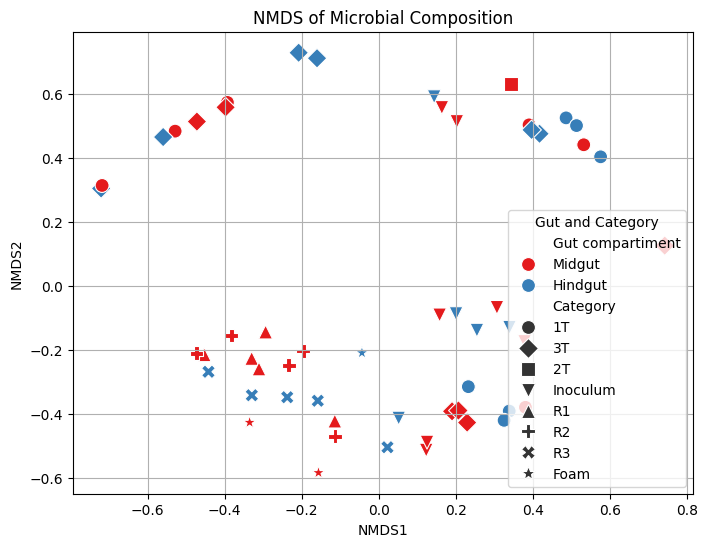

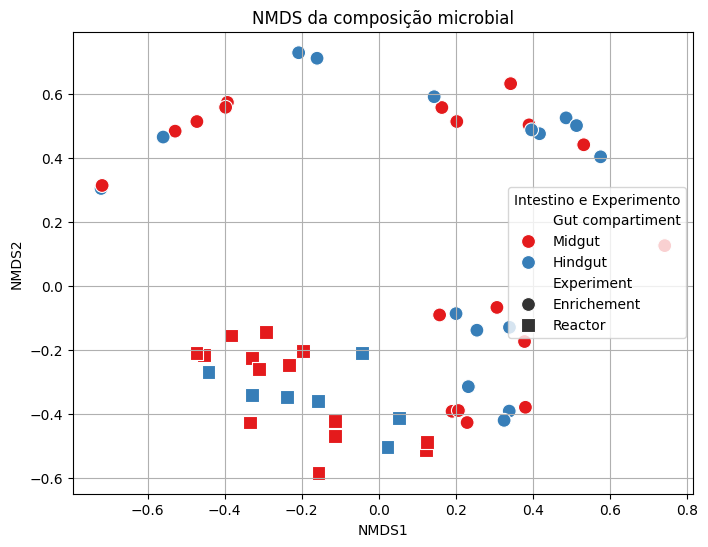

Teste t para Shannon: t=0.8597, p=0.3938
Teste t para ASVs observados: t=1.6554, p=0.1038


<ipython-input-31-834d70c23fbc>:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=metadata, x='Gut compartiment', y='Shannon', palette='Set2')


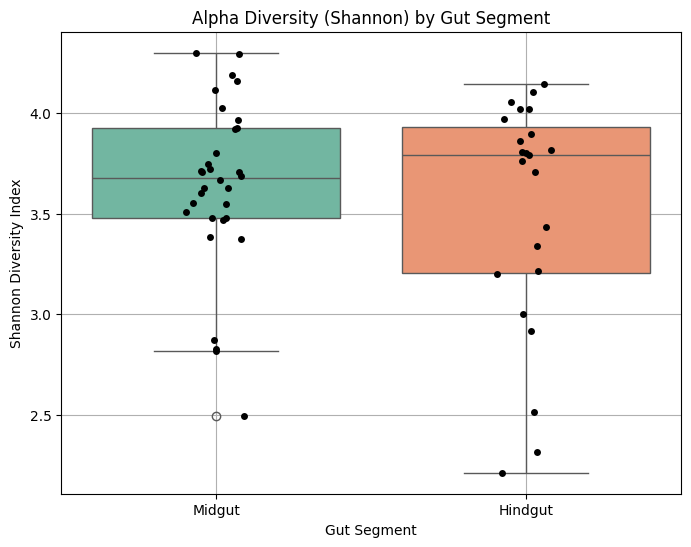

<ipython-input-31-834d70c23fbc>:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=metadata, x='Gut compartiment', y='Observed_OTU', palette='Set2')


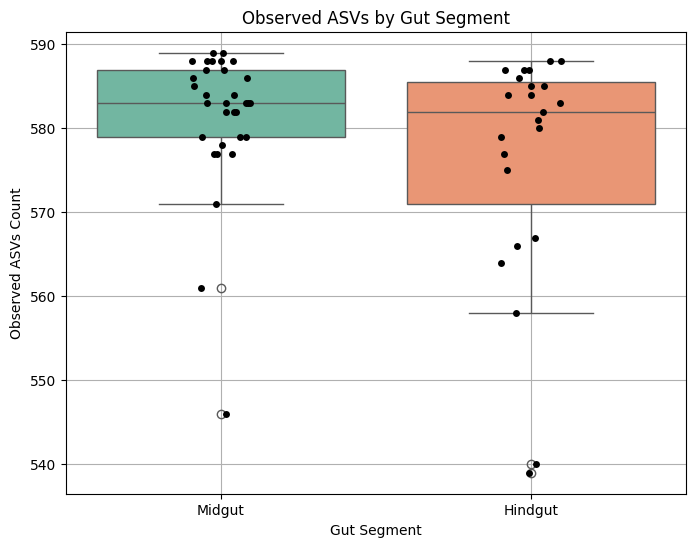

PERMANOVA results: pseudo-F=1.5141, p-value=0.1520
Teste t para Shannon: t=-1.5672, p=0.1230
Teste t para ASVs observados: t=-2.5666, p=0.0131


<ipython-input-31-834d70c23fbc>:139: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=metadata, x='Experiment', y='Shannon', palette='Set2')


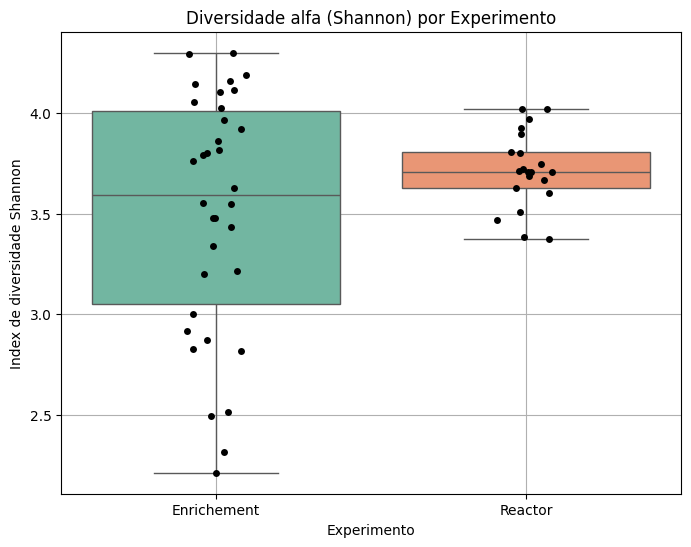

<ipython-input-31-834d70c23fbc>:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=metadata, x='Experiment', y='Observed_OTU', palette='Set2')


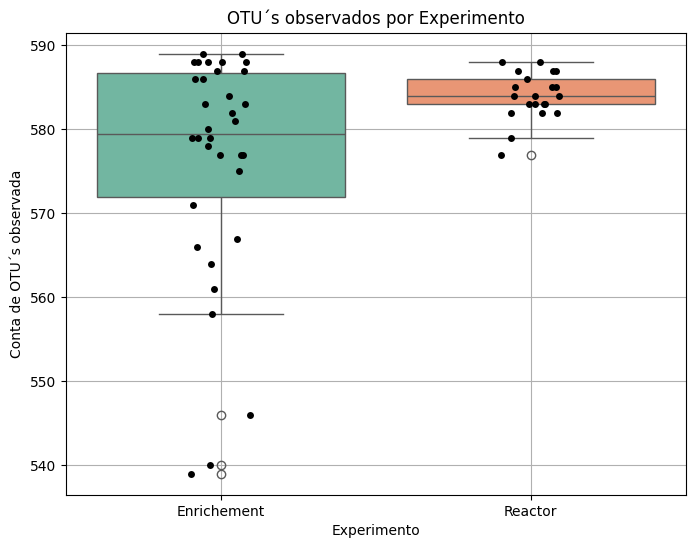

PERMANOVA results: pseudo-F=14.0135, p-value=0.0010


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from skbio.diversity import alpha_diversity
from skbio.stats.distance import permanova
from scipy.spatial.distance import pdist, squareform
from scipy.stats import ttest_ind
from skbio import DistanceMatrix


# Remover a coluna 'SampleID' antes de calcular as distâncias
data_numeric = data.drop(columns=['SampleID'])

# Configuração dos gráficos
markers = {
    '1T': 'o',        # círculo
    '2T': 's',        # quadrado
    '3T': 'D',        # losango
    'R1': '^',        # triângulo
    'R2': 'P',        # pentágono
    'R3': 'X',        # cruz
    'Foam': '*',      # estrela
    'Inoculum': 'v'   # triângulo invertido
}

markers_exp = {
    'Enrichement': 'o',  # círculo
    'Reactor': 's',     # quadrado
}

# Cálculo de distâncias (usando distância Bray-Curtis, comum em microbiomas)
dist_matrix = pdist(data_numeric, metric='braycurtis')
dist_matrix_square = squareform(dist_matrix)

# Realizando NMDS (utilizando MDS do sklearn como alternativa)
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
nmds_results = mds.fit_transform(dist_matrix_square)


# Adicionando resultados do NMDS no dataframe de metadados
metadata['NMDS1'] = nmds_results[:, 0]
metadata['NMDS2'] = nmds_results[:, 1]

# Plotando o gráfico de NMDS com separação por cor (Gut) e forma (Category)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=metadata, x='NMDS1', y='NMDS2', hue='Gut compartiment', style='Category',
                palette='Set1', s=100, markers=markers)
plt.title('NMDS of Microbial Composition')
plt.xlabel('NMDS1')
plt.ylabel('NMDS2')
plt.legend(title='Gut and Category')
plt.grid(True)
plt.show()

# Plotando o gráfico de NMDS com separação por cor (Gut) e forma (Experiment)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=metadata, x='NMDS1', y='NMDS2', hue='Gut compartiment', style='Experiment',
                palette='Set1', s=100, markers=markers_exp)
plt.title('NMDS da composição microbial')
plt.xlabel('NMDS1')
plt.ylabel('NMDS2')
plt.legend(title='Intestino e Experimento')
plt.grid(True)
plt.show()

# Calcular a diversidade alfa usando o índice de Shannon e número de ASVs observados
diversity_shannon = alpha_diversity('shannon', data_numeric.values, ids=metadata.index)
diversity_observed_asv = np.sum(data_numeric.values > 0, axis=1)  # Contagem de ASVs observados
metadata['Shannon'] = diversity_shannon
metadata['Observed_OTU'] = diversity_observed_asv

# Teste t pareado entre HRT de 8 dias e 2 dias (Shannon e Observed ASV)
group_8d = metadata[metadata['Gut compartiment'] == 'Midgut']
group_2d = metadata[metadata['Gut compartiment'] == 'Hindgut']

# Teste t para Shannon
t_shannon, p_shannon = ttest_ind(group_8d['Shannon'], group_2d['Shannon'])

# Teste t para ASV observados
t_asv, p_asv = ttest_ind(group_8d['Observed_OTU'], group_2d['Observed_OTU'])

print(f"Teste t para Shannon: t={t_shannon:.4f}, p={p_shannon:.4f}")
print(f"Teste t para ASVs observados: t={t_asv:.4f}, p={p_asv:.4f}")

# Plotando o boxplot da diversidade de Shannon por segmento "Gut"
plt.figure(figsize=(8, 6))
sns.boxplot(data=metadata, x='Gut compartiment', y='Shannon', palette='Set2')
sns.stripplot(data=metadata, x='Gut compartiment', y='Shannon', color='black', jitter=True)
plt.title('Alpha Diversity (Shannon) by Gut Segment')
plt.ylabel('Shannon Diversity Index')
plt.xlabel('Gut Segment')
plt.grid(True)
plt.show()

# Plotando o boxplot da contagem de ASVs observados
plt.figure(figsize=(8, 6))
sns.boxplot(data=metadata, x='Gut compartiment', y='Observed_OTU', palette='Set2')
sns.stripplot(data=metadata, x='Gut compartiment', y='Observed_OTU', color='black', jitter=True)
plt.title('Observed ASVs by Gut Segment')
plt.ylabel('Observed ASVs Count')
plt.xlabel('Gut Segment')
plt.grid(True)
plt.show()

# Criar um objeto DistanceMatrix com os IDs das amostras
dist_matrix_obj = DistanceMatrix(dist_matrix_square, ids=data.index)
# Filtrar o metadata para garantir que os IDs correspondem
# print(dist_matrix_obj.ids)  # IDs da matriz de distâncias
# print(metadata.index)  # IDs no DataFrame metadata
# print(set(dist_matrix_obj.ids) - set(metadata.index))  # IDs na matriz de distâncias, mas não no metadata
# print(set(metadata.index) - set(dist_matrix_obj.ids))  # IDs no metadata, mas não na matriz de distâncias
permanova_results = permanova(dist_matrix_obj, metadata['Gut compartiment'], permutations=999)
print(f"PERMANOVA results: pseudo-F={permanova_results['test statistic']:.4f}, p-value={permanova_results['p-value']:.4f}")

#------------------------------------------------------------------------------------------------
# Calcular a diversidade alfa usando o índice de Shannon e número de ASVs observados
diversity_shannon = alpha_diversity('shannon', data_numeric.values, ids=metadata.index)
diversity_observed_asv = np.sum(data_numeric.values > 0, axis=1)  # Contagem de ASVs observados
metadata['Shannon'] = diversity_shannon
metadata['Observed_ASV'] = diversity_observed_asv

# Teste t pareado entre HRT de 8 dias e 2 dias (Shannon e Observed ASV)
group_8d = metadata[metadata['Experiment'] == 'Enrichement']
group_2d = metadata[metadata['Experiment'] == 'Reactor']

# Teste t para Shannon
t_shannon, p_shannon = ttest_ind(group_8d['Shannon'], group_2d['Shannon'])

# Teste t para ASV observados
t_asv, p_asv = ttest_ind(group_8d['Observed_ASV'], group_2d['Observed_ASV'])

print(f"Teste t para Shannon: t={t_shannon:.4f}, p={p_shannon:.4f}")
print(f"Teste t para ASVs observados: t={t_asv:.4f}, p={p_asv:.4f}")

# Plotando o boxplot da diversidade de Shannon por segmento "Gut"
plt.figure(figsize=(8, 6))
sns.boxplot(data=metadata, x='Experiment', y='Shannon', palette='Set2')
sns.stripplot(data=metadata, x='Experiment', y='Shannon', color='black', jitter=True)
plt.title('Diversidade alfa (Shannon) por Experimento')
plt.ylabel('Index de diversidade Shannon')
plt.xlabel('Experimento')
plt.grid(True)
plt.show()

# Plotando o boxplot da contagem de ASVs observados
plt.figure(figsize=(8, 6))
sns.boxplot(data=metadata, x='Experiment', y='Observed_OTU', palette='Set2')
sns.stripplot(data=metadata, x='Experiment', y='Observed_OTU', color='black', jitter=True)
plt.title('OTU´s observados por Experimento')
plt.ylabel('Conta de OTU´s observada')
plt.xlabel('Experimento')
plt.grid(True)
plt.show()

# Realizando PERMANOVA para diversidade beta

# Criar um objeto DistanceMatrix com os IDs das amostras
dist_matrix_obj = DistanceMatrix(dist_matrix_square, ids=data.index)
# Filtrar o metadata para garantir que os IDs correspondem
# metadata_filtered = metadata.loc[dist_matrix_obj.ids]
permanova_results = permanova(dist_matrix_obj, metadata['Experiment'], permutations=999)
print(f"PERMANOVA results: pseudo-F={permanova_results['test statistic']:.4f}, p-value={permanova_results['p-value']:.4f}")
